# Machine Learning 

<center><img src="ml.jpg" style="height:350px"/></center>

## <i><u>Welcome to Coursera</u></i>!

                                                                                                                  Instructor: Andrew Ng

**Machine Learning :** Field of study that gives computers the ability to learn without being explicitly programmed.

Machine learning algorithms<br>
- Supervised learning <br>
- Unsupervised learning<br>
- Reinforcement learning

## Supervised Learning
A set of labeled input-output pairs is fed. The machine learns from being given the 'right answers'.<br>
Then machine provides output to new inputs.

There are different types of Supervised learning : <i>Regression</i>, <i>Classification</i>.

## Unsupervised Learning
Unsupervised learning finds something interesting in unlabeled data : <i>Clustering</i>.<br>

Data only comes with inputs $x$, but not output labels $y$. Algorithm has to find <i><b>structure</b></i> in the data.

- <b>Clustering :</b> Group similar data points together.
- <b>Dimensionality reduction :</b> Compress data using fewer numbers.
- <b>Anomaly detection :</b> Find unusual data points

---

> ## <u>Optional Lab: Brief introduction to Python and Jupyter Notebooks</u>

<br>

Welcome to the first optional lab! Optional labs are available to:
- Provide information - like this notebook
- Reinforce lecture material with hands-on examples
- Provide working examples of routines used in the graded labs

## Goals
In this lab, you will:
- Get a brief introduction to Jupyter notebooks
- Take a tour of Jupyter notebooks
- Learn the difference between markdown cells and code cells
- Practice some basic python

<b>Print statement</b><br>
Print statements will generally use the python f-string style.<br>
Try creating your own print in the following cell.<br>
Try both methods of running the cell.

In [5]:
# print statements
variable="right in the strings!"
print(f"f strings allow you to embed variables {variable}")

f strings allow you to embed variables right in the strings!


## Congratulations!
You now know how to find your way around a Jupyter Notebook.

---

> ## <u>Optional Lab: Model Representation</u>


## Goals
In this lab you will:
- Learn to implement the model $f_{w,b}$ for linear regression with one variable 

## Notation
Here is a summary of some of the notation you will encounter

<center><img src="cml2.png" style="height:350px"/></center>

## Tools
In this lab you will make use of
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

<br>

## Problem statement


As in this lecture, we will use the motivating example of housing price prediction.<br>

This lab will use a simple dataset with only two data points - a house with 1000 sqft sold for \\$300,000 and a house with 2000 square feet sold for \$500,000. These two points will constitute our data or training set. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.<br>

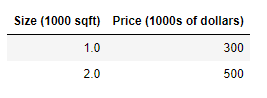

We would like to fit a linear regression model (shown above as the blue straight line)through these two points, so we can then predict price for other houses - say, a house with 1200 sqft.

Let us run the following code to create our '<b>x_train</b>' and '<b>y_train</b>' variables. The data is stored in one-dimensional NumPy arrays.

In [6]:
# x_train is the input variable (size in 1000 sqft)
# y_train is the target (price in 1000s of dollars)
x_train=np.array([1.0,2.0])
y_train=np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


<br>

## Number of training examples $m$

We will use $m$ to denote the number of training examples. NumPy arrays have a '<b>.shape</b>' parameter. '<b>c_train.shape</b>' returns a python tuple with an entry for each dimension. '<b>x_train.shape$\,$[$\,0\,$]</b>' is the length of the array and number of examples as shown below.

In [7]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m=x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


<br>

One can also use the Python '<b>len($\,$)</b>' function as shown below

In [8]:
# m is the number of training examples
m=len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


<br>

## Training example '<b>x_i, y_i</b>'

We will use $(x^{\,(\,i\,)},\,y^{\,(\,i\,)})$ to denote the $i^{th}\,$ training example. Since Python is zero-indexed, $(x^{\,(\,0\,)},\,y^{\,(\,0\,)})$ is $(1.0\,,\,300.0)$ and $(x^{\,(\,1\,)},\,y^{\,(\,1\,)})$ is $(2.0\,,\,500.0)$.<br>

To access a value in a NumPy array, one indexes the array with the desired offset. For example, the syntax to access location zero of '<b>x_train</b>' is '<b>x_train$\,$[$\,0\,$]</b>'.<br>

We run the next code to get the $i^{th}\,$ training example.

In [9]:
i=[0,1]
for i in i:
    x_i=x_train[i]
    y_i=y_train[i]
    print(f"(x^{i},y^({i})) = ({x_i},{y_i})")

(x^0,y^(0)) = (1.0,300.0)
(x^1,y^(1)) = (2.0,500.0)


<br>

## Plotting the data

We can plot these two points using the '<b>scatter()</b>' function in the '<b>matplotlib</b>' library, as shown in the cell below.
- The function arguments '<b>marker</b>' and '<b>c</b>' show the points as red crosses.


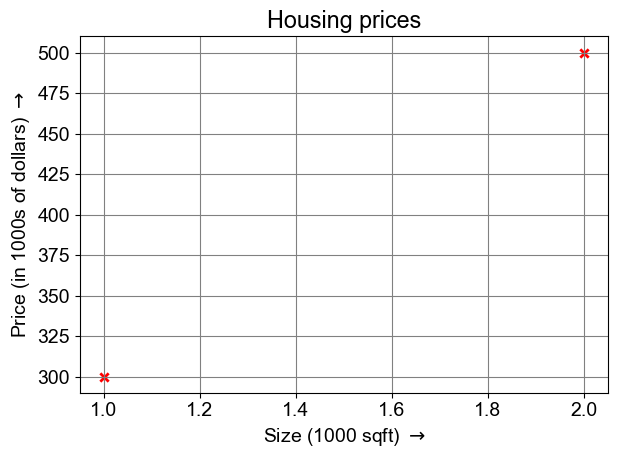

In [10]:
# plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')

# set the title
plt.title("Housing prices")

# set the axes labels
plt.xlabel(r'Size (1000 sqft) $ \rightarrow $')
plt.ylabel(r'Price (in 1000s of dollars) $ \rightarrow $')
plt.grid()
plt.tight_layout()

<br>

## Model function


The model function for linear regression (which is a function that maps from $x$ to $y$) is represented as
\begin{equation}
    f_{w,b}\,(x^{(i)})=wx^{(i)}+b \tag{1}
\end{equation}

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.

Let's try to get a better intuition for this through the code blocks below. Let's start with $w=100$ and $b=100$.

In [11]:
w=100
b=100
print(f"w:{w}")
print(f"b:{b}")

w:100
b:100


Now let's compute the value of $f_{w,b}\,(x^{(i)})$ for our two data points. We can explicitly write this out for each data points as -<br>

for $x^{\,(0)}\,$, <b>f_wb$\,$=$\,$w * x$\,$[$\,$0$\,$]$\,$+$\,$b</b><br>
for $x^{\,(1)}\,$, <b>f_wb$\,$=$\,$w * x$\,$[$\,$1$\,$]$\,$+$\,$b</b><br>

For a large number of data points, this can get unwieldy and repetitive.<br>
So instead, we can calculate the function output in a <b>for</b> loop as shown in the <b>compute_model_output</b> function shown below

In [12]:
def compute_model_output(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=w*x[i]+b
    return f_wb

<br>

Now let's call the <b>compute_model_output</b> function and plot the output.

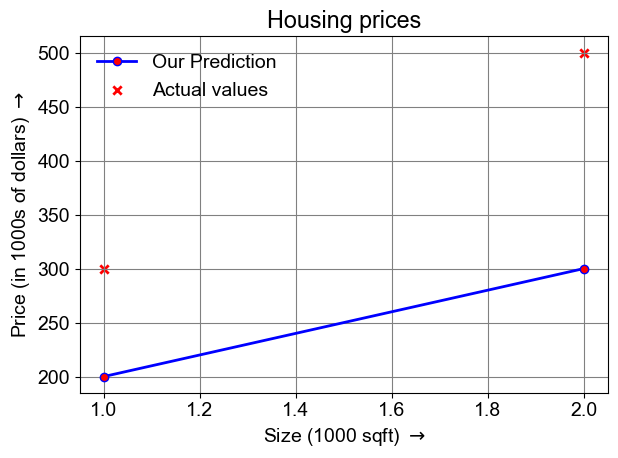

In [13]:
tmp_f_wb=compute_model_output(x_train,w,b)

# plot our model prediction
plt.plot(x_train,tmp_f_wb,c='b',label='Our Prediction')

# plot the data points
plt.scatter(x_train, y_train, marker='x',c='r',label='Actual values')

# set the title
plt.title("Housing prices")

# set the axes labels
plt.xlabel(r'Size (1000 sqft) $ \rightarrow $')
plt.ylabel(r'Price (in 1000s of dollars) $ \rightarrow $')
plt.grid()
plt.legend()
plt.tight_layout()


As we can see, setting $w=100$ and $b=100$ does not result in a line that fits our data.

We may try experimenting with different values of $w$ and $b$.<br>

We find $w=200$ and $b=100$ serves our purpose.

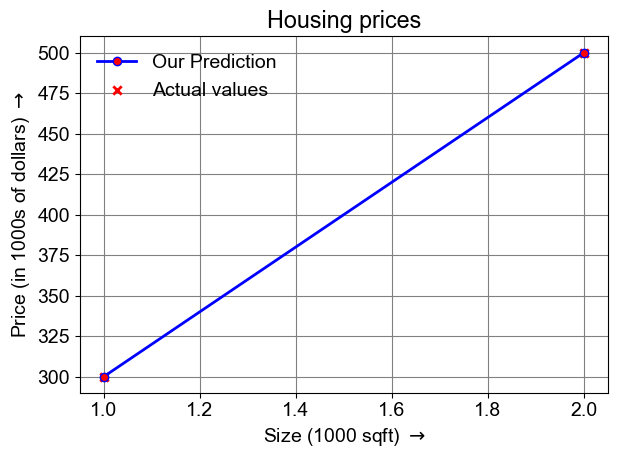

In [15]:
# assigning values to w and b
w=200
b=100

tmp_f_wb=compute_model_output(x_train,w,b)

# plot our model prediction
plt.plot(x_train,tmp_f_wb,c='b',label='Our Prediction')

# plot the data points
plt.scatter(x_train, y_train, marker='x',c='r',label='Actual values')

# set the title
plt.title("Housing prices")

# set the axes labels
plt.xlabel(r'Size (1000 sqft) $ \rightarrow $')
plt.ylabel(r'Price (in 1000s of dollars) $ \rightarrow $')
plt.grid()
plt.legend()
plt.tight_layout()

<br>

## Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with $1200$ sqft. Since the units of $x$ are in $1000$'s of sqft, $x$ is $1.2\,$.

In [16]:
w=200
b=100
x_i=1.2
cost_1200sqft=w*x_i+b
print(f"${cost_1200sqft:0f} thousand dollars")

$340.000000 thousand dollars


<br>

## Congratulations!

In this lab you have learned:
- Linear regression builds a model which establishes a relationship between features and targets
    - In the example above, the feature was house size and the target was house price
    - For simple linear regression, the model has two parameters $w$ and $b$ whose values are <i>fit</i> using <i>training data</i>
    - Once a model's parameters have been determined, the model can be used to make predictions on novel data.}

---

> ## <u> Optional Lab: Cost Function</u>

## Goals
In this lab we will
- Implement and explore the <b>cost</b> function fo linear regression with one variable

## Tools
In this lab, we will make use of
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- local plotting routines in the lab_utils_uni.py file in the local directory

Some local functions are not supported here.<br>
Do check this ipynb file<br>
https://www.coursera.org/learn/machine-learning/ungradedLab/udPHh/optional-lab-cost-function/lab?path=%2Fnotebooks%2FC1_W1_Lab03_Cost_function_Soln.ipynb

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


<br>

---

<br>

## <u>Optional Lab: Gradient Descent for Linear Regression</u>

## Goals
In this lab, we will
- Automate the process of optimizing $w$ and $b$ using gradient descent

## Tools
In this lab, we will make use of
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [2]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('deeplearning.mplstyle')

## Problem Statement
Let's use the same two data points as before - a house with 1000 sqft sold for \\$300,000 and a house with 2000 sqft sold for \\$500,000

<img src="cml4.png">

In [3]:
# load our data set
x_train=np.array([1.0,2.0])
y_train=np.array([300.0,500.0])

# Compute_cost
This was developed in the last lab. We'll need it again here

In [4]:
# Function to calculate the cost
def compute_cost(x,y,w,b):

    m=x.shape[0]
    coat=0

    for i in range(m):
        f_wb=w*x[i]+b
        cost=cost+(f_wb -y[i])**2
    total_cost=1/(2*m)*cost

    return total_cost

## Gradient descent summary

So far in this course, we have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
\begin{equation}
    f_{w,b}(x^{(i)})=wx^{(i)}+b \tag{1}
\end{equation}

In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions$f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the <i>cost</i>, $J(w,b)$. In training we measure the cost over all of our training samples $x^{(i)}$, $y^{(i)}$

\begin{equation}
J(w,b)=\frac{1}{2m} \sum^{m-1}_{i=0}(f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}
\end{equation}

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## Implement Gradient Descent
We will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

<br>
Please refer to <br>
<href="https://www.coursera.org/learn/machine-learning/ungradedLab/lE1al/optional-lab-gradient-descent/lab?path=%2Fnotebooks%2FC1_W1_Lab04_Gradient_Descent_Soln.ipynb>
from now onwards.